# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['glaucoma',"normal","cataract","Diabetic retina"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data


In [3]:
def load_data():

    datasets = [r'train', r'test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading train


100%|██████████| 1074/1074 [00:21<00:00, 48.82it/s]


Loading test


100%|██████████| 1074/1074 [00:27<00:00, 39.38it/s]


In [5]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4217
Number of testing examples: 4217
Each image is of size: (150, 150)


<Figure size 800x500 with 0 Axes>

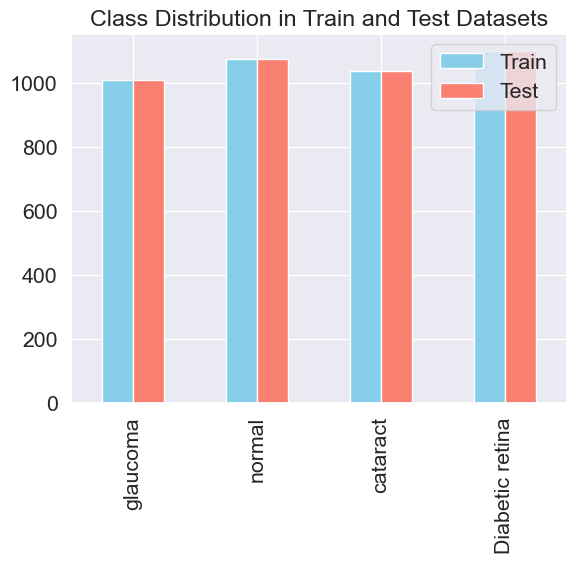

In [6]:

import pandas as pd
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

# Bar Plot
plt.figure(figsize=(8, 5))
pd.DataFrame({'Train': train_counts, 'Test': test_counts}, index=class_names).plot.bar(color=['skyblue', 'salmon'])
plt.title('Class Distribution in Train and Test Datasets')
plt.show()


In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

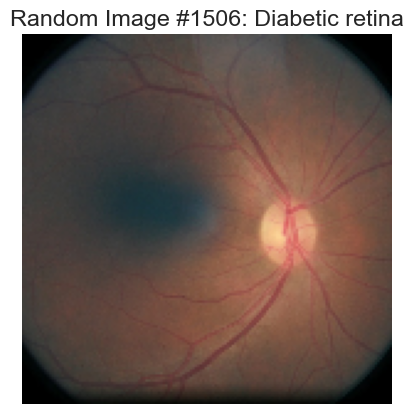

In [8]:
# Display random image from the dataset
def show_random_image(class_names, images, labels):
    idx = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[idx])
    plt.title(f"Random Image #{idx}: {class_names[labels[idx]]}")
    plt.axis('off')
    plt.show()

# Call function
show_random_image(class_names, train_images, train_labels)


In [9]:
def display_examples(class_names, images, labels):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

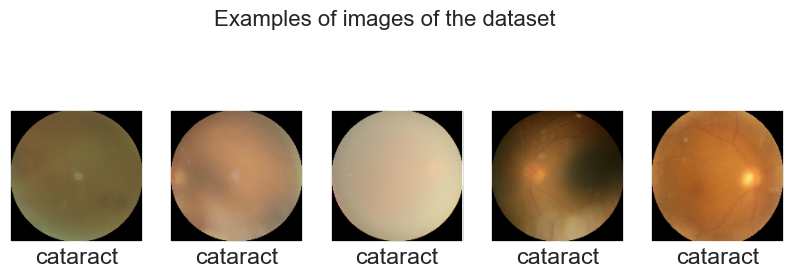

In [10]:
display_examples(class_names, train_images, train_labels)

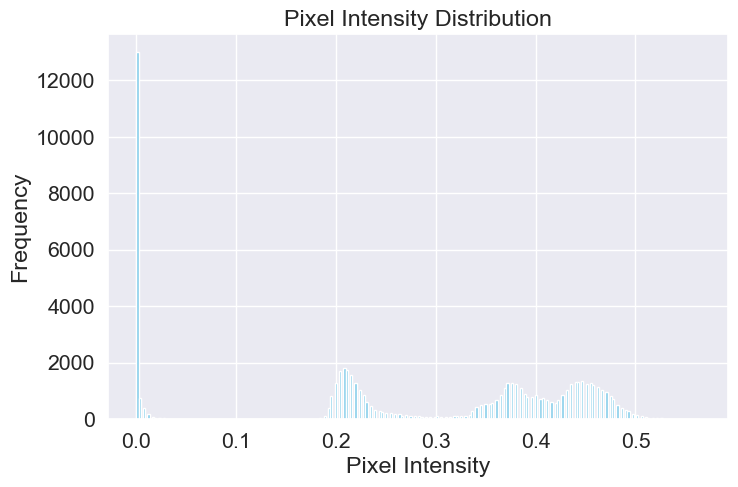

In [11]:
def plot_pixel_intensity_histogram(image):
    plt.figure(figsize=(8, 5))
    plt.hist(image.ravel(), bins=256, color='skyblue')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Example with a sample image from train_images
plot_pixel_intensity_histogram(train_images[0])


C:\Users\SRIRA\AppData\Local\Temp\ipykernel_22820\2858814112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')


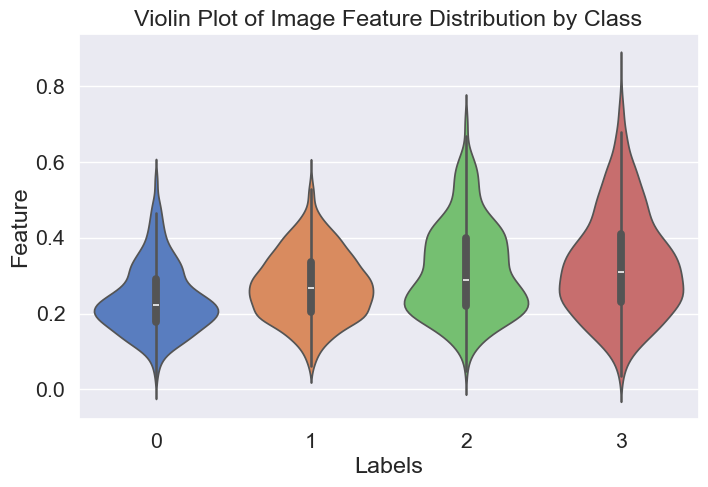

In [12]:
import seaborn as sns
df = pd.DataFrame({'Labels': train_labels, 'Feature': [np.mean(img) for img in train_images]})
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Labels', y='Feature', palette='muted')
plt.title('Violin Plot of Image Feature Distribution by Class')
plt.show()


PROPOSED METHODS

In [13]:
batch_size =15
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [15]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = cnn_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
27/27 [==============================] - 495s 18s/step - loss: 1.2910 - accuracy: 0.5615 - val_loss: 1.4705 - val_accuracy: 0.2938
Epoch 2/10
27/27 [==============================] - 875s 33s/step - loss: 0.6203 - accuracy: 0.7367 - val_loss: 1.5875 - val_accuracy: 0.0024
Epoch 3/10
27/27 [==============================] - 252s 9s/step - loss: 0.5087 - accuracy: 0.7773 - val_loss: 1.2781 - val_accuracy: 0.4502
Epoch 4/10
27/27 [==============================] - 317s 12s/step - loss: 0.4555 - accuracy: 0.8023 - val_loss: 1.3883 - val_accuracy: 0.4230
Epoch 5/10
27/27 [==============================] - 285s 10s/step - loss: 0.4019 - accuracy: 0.8280 - val_loss: 1.3679 - val_accuracy: 0.4289
Epoch 6/10
27/27 [==============================] - 292s 11s/step - loss: 0.3567 - accuracy: 0.8529 - val_loss: 1.2585 - val_accuracy: 0.5130
Epoch 7/10
27/27 [==============================] - 314s 12s/step - loss: 0.3269 - accuracy: 0.8672 - val_loss: 1.8127 - val_accuracy: 0.2322
Epoch 8

In [17]:
test_loss = cnn_model.evaluate(test_images, test_labels)

132/132 [==============================] - 71s 537ms/step - loss: 0.6291 - accuracy: 0.7633


In [18]:
cnn_model.save('cnn_model.h5')

C:\Users\SRIRA\anaconda3\envs\opthalamic\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model_json=cnn_model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('cnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)

def classify(cnn_model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = cnn_model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)
    label_names =['glaucoma',"normal","cataract","Diabetic retina"]

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob



# home page
@app.route("/")
def home():
    return render_template("index.html")


@app.route("/result", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("index.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "result.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/result/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()



ModuleNotFoundError: No module named 'flask'